In [70]:
import pandas as pd
import numpy as np
import platform #os 정보를 가져 올 수 있는 모듈

from matplotlib import font_manager, rc # font_manager : 폰트 관리 모듈, rc : 폰트 변경 모듈
from matplotlib import pyplot as plt # 시각화 도구
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False # 유니코드 표현 설정하기

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # OS가 APPLE(Darwin)이면 AppleGothic으로 폰트 설정
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf" #OS가 윈도우즈면 맑은 고딕으로 설정
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System... sorry~~~~')

In [127]:
edu = pd.read_csv("./data/xAPI-Edu-Data.csv")
edu.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# 결석률_성적_상관관계
### 가설: 결석률이 높을수록 학업 성취도가 낮을 것이다.


In [72]:
edu_copy = edu.copy()

#### Class L 학생 추출

In [130]:
class_L_mask = edu_copy["Class"] == 'L'
edu_L = edu[class_L_mask]
edu_L.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
12,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,5,1,0,11,No,Bad,Above-7,L
13,M,lebanon,lebanon,MiddleSchool,G-08,A,Math,F,Father,20,14,12,19,No,Bad,Above-7,L


#### Class M 학생 추출

In [74]:
class_M_mask = edu_copy["Class"] == 'M'
edu_M = edu[class_M_mask]
edu_M.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M


#### Class H 학생 추출

In [75]:
class_H_mask = edu_copy["Class"] == 'H'
edu_H = edu[class_H_mask]
edu_H.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
10,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,88,30,80,Yes,Good,Under-7,H
14,F,KW,KuwaIT,MiddleSchool,G-08,A,Math,F,Mum,62,70,44,60,No,Bad,Above-7,H
19,M,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Mum,70,50,40,99,Yes,Good,Under-7,H
30,F,KW,KuwaIT,MiddleSchool,G-08,A,Arabic,F,Father,35,80,50,70,Yes,Good,Under-7,H
47,F,KW,KuwaIT,HighSchool,G-12,A,English,F,Mum,70,4,39,90,Yes,Good,Under-7,H


#### Class L 학생 - 결석률 추출

In [76]:
edu_L_ab = edu_L.groupby('StudentAbsenceDays')[['Class']].count()
edu_L_ab=edu_L_ab.rename(columns={"Class":"L"})
edu_L_ab

,L
StudentAbsenceDays,
Above-7,116
Under-7,11


#### Class M 학생 - 결석률 추출

In [131]:
edu_M_ab = edu_M.groupby('StudentAbsenceDays')[['Class']].count()
edu_M_ab=edu_M_ab.rename(columns={"Class":"M"})
edu_M_ab

,M
StudentAbsenceDays,
Above-7,71
Under-7,140


#### Class H 학생 - 결석률 추출

In [78]:
edu_H_ab = edu_H.groupby('StudentAbsenceDays')[['Class']].count()
edu_H_ab=edu_H_ab.rename(columns={"Class":"H"})
edu_H_ab

,H
StudentAbsenceDays,
Above-7,4
Under-7,138


#### Class별 결석률 데이터 병합

In [82]:
edu_concat = pd.concat([edu_L_ab, edu_M_ab, edu_H_ab], axis=1)
edu_concat

,L,M,H
StudentAbsenceDays,,,
Above-7,116,71,4
Under-7,11,140,138


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] =(8, 5)

#### Class별 출석률 데이터 Heatmap으로 표현

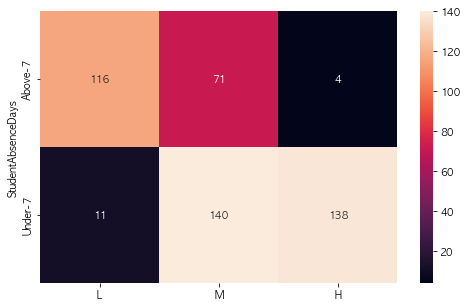

In [84]:
x = edu_concat
sns.heatmap(x, annot=True, fmt='d')
plt.show()

* 결석률이 낮을수록 성적이 높은 경우가 많다.
* 결석률이 높을수록 성적이 낮은 경우가 많다.
* 결론: 결석률과 성적 간에는 유의미한 상관관계가 있는 것으로 보인다.
       결석률이 높을수록 성적이 낮은 경우가 많다.

# IT성적분포_by_성별
### 가설: IT 과목의 경우, 여학생보다 남학생의 성적이 더 높을 것이다.


In [123]:
IT_mask = edu['Topic'] == 'IT'
edu_IT = edu[IT_mask]
edu_IT

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,M,KW,KuwaIT,lowerlevel,G-02,C,IT,S,Father,0,3,10,3,No,Bad,Above-7,L
133,M,KW,KuwaIT,lowerlevel,G-02,A,IT,S,Father,12,60,0,70,Yes,Good,Above-7,L
244,M,KW,KuwaIT,MiddleSchool,G-07,B,IT,S,Mum,70,92,83,85,Yes,Bad,Under-7,H
245,F,KW,KuwaIT,MiddleSchool,G-06,A,IT,S,Father,50,40,52,66,Yes,Bad,Under-7,M


#### IT 선택 남학생 추출

In [124]:
gender_mask1 = edu_IT['gender'] == 'M'

edu_IT_M = edu_IT[gender_mask1]
edu_IT_M.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


#### IT 선택 여학생 추출

In [95]:
gender_mask2 = edu_IT['gender'] == 'F'

edu_IT_F = edu_IT[gender_mask2]
edu_IT_F.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M
15,F,KW,KuwaIT,MiddleSchool,G-06,A,IT,F,Father,30,40,22,66,Yes,Good,Under-7,M
18,F,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Mum,69,15,36,96,Yes,Good,Under-7,M
20,F,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Father,60,60,33,90,No,Bad,Above-7,M


#### IT 선택 남학생 성적 추출

In [135]:
column_names = ["Topic"]
edu_IT_M_by_class = edu_IT_M.groupby("Class")[column_names].count()
edu_IT_M_by_class

,Topic
Class,
H,8
L,31
M,24


#### IT 선택 여학생 성적 추출

In [126]:
column_names = ["Topic"]
edu_IT_F_by_class = edu_IT_F.groupby("Class")[column_names].count()
edu_IT_F_by_class

,Topic
Class,
H,7
L,7
M,18


#### IT 선택 남학생, 여학생 성적 분포 파이차트로 표현

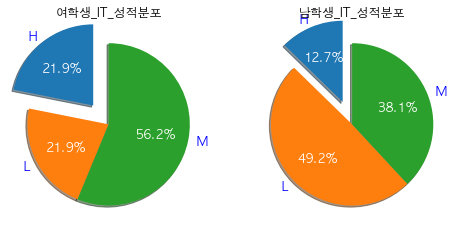

()

In [128]:
plt.subplot(1, 2, 1) 

labels = edu_IT_F_by_class.index 
sizes  = edu_IT_F_by_class['Topic']

explode = (0.3, 0, 0)

patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90
)


for t in texts:
  t.set_fontsize(12)
  t.set_color('blue')


for t in autotexts:
  t.set_fontsize(12)
  t.set_color('white')

plt.title("여학생_IT_성적분포")

plt.subplot(1, 2, 2)# 1행 2열에 두번째 (2번째 열)

labels = edu_IT_M_by_class.index # column이었으면 columns치기
sizes  = edu_IT_M_by_class['Topic'] # 파이에서 차지할 비율 - percentage
# size에 values넣기
explode = (0.3, 0, 0)

patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90
)

for t in texts:
  t.set_fontsize(12)
  t.set_color('blue')


for t in autotexts:
  t.set_fontsize(12)
  t.set_color('white')

plt.title("남학생_IT_성적분포")

plt.show()
()

### 결론: 해당 데이터만을 바탕으로 분석했을 때, 여학생의 성적이 더 높은 것으로 확인된다. 
(하지만, 여학생의 표본수가 현저히 적기 때문에 이 자료만을 바탕으로 유의미한 해석을 하기는 어렵다고 판단한다.) 